# Week 5 Tutorial

### Setup

In [8]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
from util_func import *

In [3]:
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25872 sha256=776be47fe894986c26bda2e7b21af9692ba80e96b41fd1547634e6b34a5dd3f2
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\4b\a5\2d\4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils


### Exercise 1

In [4]:
import imutils as im

img = cv.imread("images/lena.jfif")

rotated_img = im.rotate_bound(img, angle=-45)

show_img("rotation", rotated_img)

In [5]:
img = cv.imread("images/lena.jfif")

h, w = img.shape[:2]
angle = 45

yc, xc = h // 2, w // 2

M = cv.getRotationMatrix2D((200, 80), angle, 1)
dst = cv.warpAffine(img, M, (w+yc, h+xc))

# M = np.float32([[1, 0, tx],[0, 1, ty]])
#dst_new = cv.warpAffine(dst, M, (w+150, h+150))

show_img("rotation", dst)

### Exercise 2

In [6]:
img = cv.imread("images/native-bee.png")
img2 = cv.imread("images/flower.jfif")

rows, cols, channels = img2.shape
roi = img[0:rows, 0:cols]

img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
#70 = intensity value of the pixel, to remove black bg, 255, maximum intensity value
ret, mask = cv.threshold(img2gray, 70, 255, cv.THRESH_BINARY) 
mask_inv = cv.bitwise_not(mask)

img_bg = cv.bitwise_and(roi,roi,mask = mask_inv)
img2_fg = cv.bitwise_and(img2,img2,mask = mask)

dst = cv.add(img_bg,img2_fg)
img[0:rows, 0:cols] = dst

show_img("result", img)
cv.waitKey(0)
cv.destroyAllWindows()

### Exercise 3

(<AxesSubplot:title={'center':'normal'}>, None)

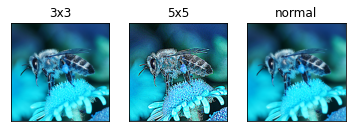

In [9]:
img = cv.imread("images/native-bee.png")

kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
kernel2 = np.array([[-1, -1, -1, -1, -1],
                   [-1, -1, -1, -1, -1],
                   [-1, -1, 25, -1, -1],
                   [-1, -1, -1, -1, -1],
                   [-1, -1, -1, -1, -1]])

dst = cv.filter2D(img, -1, kernel)
dst2 = cv.filter2D(img, -1, kernel2)

plt.subplot(131), plt_img(dst, "3x3") 
#sharpend wihtin the range of formula  (sharpened = original + (original − blurred) × amount), pic look obvious and clean
plt.subplot(132), plt_img(dst2, "5x5") 
#Way too much sharpend, consists of noise in the picture
plt.subplot(133), plt_img(img, "normal")

### Exercise 4

(<AxesSubplot:title={'center':'median'}>, None)

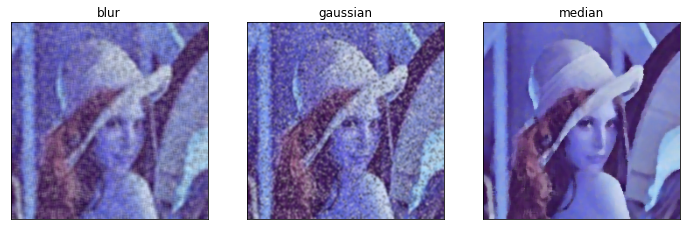

In [10]:
img = cv.imread("images/noise_lena.jpg")

blur_filtered = cv.blur(img, (5, 5))
gaussian_filtered = cv.GaussianBlur(img, (5, 5), 0)
median_filtered = cv.medianBlur(img, 5)

plt.figure(figsize=(12, 4))
           
plt.subplot(131), plt_img(blur_filtered, "blur") 
# blurry image just like not wearing glasses when having short/long sightedness, less noise compare to gaussian
# hard to see the details of the pic in general.
plt.subplot(132), plt_img(gaussian_filtered, "gaussian") 
# more sharper, the edges / lines and details are well maintainted, more clearer in general, 
# salt and pepper noise are very obvious.
plt.subplot(133), plt_img(median_filtered, "median")
# All of the noise (salt and pepper noise) removed effectively, able to see the picture without obstacles
# however details are not maintained.